## Name : Adwaiy Singh
## Reg. No. : 220968424
## Sec. : A
## Batch: 2

# WEEK 5

In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import InputLayer, Flatten, Dense, SimpleRNN, LSTM
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("BPD_Part_1_Victim_Based_Crime_Data.csv")

In [3]:
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'], format="mixed")

In [4]:
larceny = df[df['CrimeCode'].str.startswith('6')]
burglary = df[df['CrimeCode'].str.startswith('5')]

LarcenyTs = larceny.groupby(larceny['CrimeDate'].dt.date).size()
BurglaryTs = burglary.groupby(burglary['CrimeDate'].dt.date).size()

LarcenyTs = LarcenyTs.reindex(pd.date_range(start='2014-01-01', end='2016-12-31'), fill_value=0)
BurglaryTs = BurglaryTs.reindex(pd.date_range(start='2014-01-01', end='2016-12-31'), fill_value=0)

In [5]:
def create_train_test_split(series, train_end='2015-12-31', test_start='2016-01-01'):
    train_data = series[series.index <= train_end].values
    test_data = series[series.index >= test_start].values
    return train_data, test_data

In [6]:
def reshape_data(data, timesteps):
    X, y = [], []
    for i in range(len(data) - timesteps):
        X.append(data[i:i+timesteps])
        y.append(data[i+timesteps])
    return np.array(X), np.array(y)

In [7]:
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    return mape, rmse, predictions

In [8]:
def plot_results(y_test, predictions, title):
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label="Actual")
    plt.plot(predictions, label="Predicted")
    plt.title(title)
    plt.xlabel("Days")
    plt.ylabel("Number of Crimes")
    plt.legend()
    plt.show()

In [9]:
timesteps = 30

In [13]:
larceny_train, larceny_test = create_train_test_split(LarcenyTs)
burglary_train, burglary_test = create_train_test_split(BurglaryTs)

larceny_X_train, larceny_y_train = reshape_data(larceny_train, timesteps)
larceny_X_test, larceny_y_test = reshape_data(larceny_test, timesteps)
burglary_X_train, burglary_y_train = reshape_data(burglary_train, timesteps)
burglary_X_test, burglary_y_test = reshape_data(burglary_test, timesteps)

In [14]:
larceny_X_train = np.expand_dims(larceny_X_train, -1)
larceny_X_test = np.expand_dims(larceny_X_test, -1)

burglary_X_train = np.expand_dims(burglary_X_train, -1)
burglary_X_test = np.expand_dims(burglary_X_test, -1)

In [15]:
def build_rnn_model(input_shape):
    model = Sequential([
        InputLayer(input_shape=input_shape),
        SimpleRNN(64, activation='relu', return_sequences=True),
        SimpleRNN(64, activation='relu', return_sequences=True),
        SimpleRNN(64, activation='relu', return_sequences=True),
        SimpleRNN(64, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse')
    return model

def build_lstm_model(input_shape):
    model = Sequential([
        InputLayer(input_shape=input_shape),
        LSTM(64, activation='relu', return_sequences=True),
        LSTM(64, activation='relu', return_sequences=True),
        LSTM(64, activation='relu', return_sequences=True),
        LSTM(64, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse')
    return model

In [17]:
rnn_model_larceny = build_rnn_model(input_shape=(timesteps, 1))
rnn_model_larceny.fit(larceny_X_train, larceny_y_train, epochs=50, verbose=1)
larceny_rnn_mape, larceny_rnn_rmse, larceny_rnn_predictions = evaluate_model(rnn_model_larceny, larceny_X_test, larceny_y_test)
print(f"Larceny RNN - MAPE: {larceny_rnn_mape}, RMSE: {larceny_rnn_rmse}")

Epoch 1/50
22/22 [==============================] - 3s 15ms/step - loss: 558.4250
Epoch 2/50
22/22 [==============================] - 0s 16ms/step - loss: 96.6558
Epoch 3/50
22/22 [==============================] - 0s 14ms/step - loss: 91.9143
Epoch 4/50
22/22 [==============================] - 0s 14ms/step - loss: 89.2979
Epoch 5/50
22/22 [==============================] - 0s 14ms/step - loss: 87.6077
Epoch 6/50
22/22 [==============================] - 0s 15ms/step - loss: 87.8313
Epoch 7/50
22/22 [==============================] - 0s 15ms/step - loss: 86.6614
Epoch 8/50
22/22 [==============================] - 0s 15ms/step - loss: 87.8293
Epoch 9/50
22/22 [==============================] - 0s 15ms/step - loss: 86.0556
Epoch 10/50
22/22 [==============================] - 0s 14ms/step - loss: 90.2177
Epoch 11/50
22/22 [==============================] - 0s 14ms/step - loss: 87.4966
Epoch 12/50
22/22 [==============================] - 0s 14ms/step - loss: 85.7697
Epoch 13/50
22/22 [=====

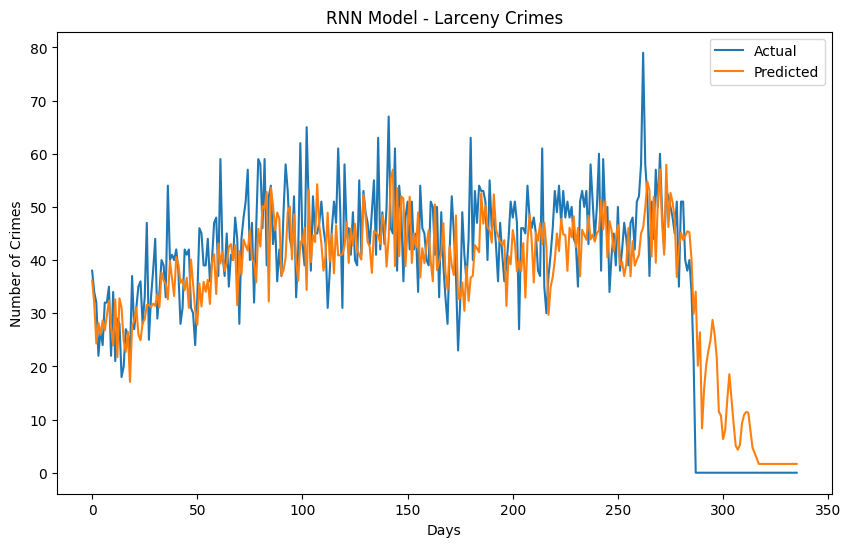

In [18]:
plot_results(larceny_y_test, larceny_rnn_predictions, "RNN Model - Larceny Crimes")

In [19]:
rnn_model_burglary = build_rnn_model(input_shape=(timesteps, 1))
rnn_model_burglary.fit(burglary_X_train, burglary_y_train, epochs=50, verbose=1)
burglary_rnn_mape, burglary_rnn_rmse, burglary_rnn_predictions = evaluate_model(rnn_model_burglary, burglary_X_test, burglary_y_test)
print(f"Burglary RNN - MAPE: {burglary_rnn_mape}, RMSE: {burglary_rnn_rmse}")

Epoch 1/50
22/22 [==============================] - 8s 20ms/step - loss: 198.1566
Epoch 2/50
22/22 [==============================] - 0s 16ms/step - loss: 103.9823
Epoch 3/50
22/22 [==============================] - 0s 15ms/step - loss: 91.7723
Epoch 4/50
22/22 [==============================] - 0s 15ms/step - loss: 89.3481
Epoch 5/50
22/22 [==============================] - 0s 14ms/step - loss: 88.6991
Epoch 6/50
22/22 [==============================] - 0s 16ms/step - loss: 86.7374
Epoch 7/50
22/22 [==============================] - 0s 15ms/step - loss: 86.1462
Epoch 8/50
22/22 [==============================] - 0s 14ms/step - loss: 87.1134
Epoch 9/50
22/22 [==============================] - 0s 15ms/step - loss: 83.5328
Epoch 10/50
22/22 [==============================] - 0s 15ms/step - loss: 85.9925
Epoch 11/50
22/22 [==============================] - 0s 15ms/step - loss: 88.6950
Epoch 12/50
22/22 [==============================] - 0s 17ms/step - loss: 82.9389
Epoch 13/50
22/22 [====

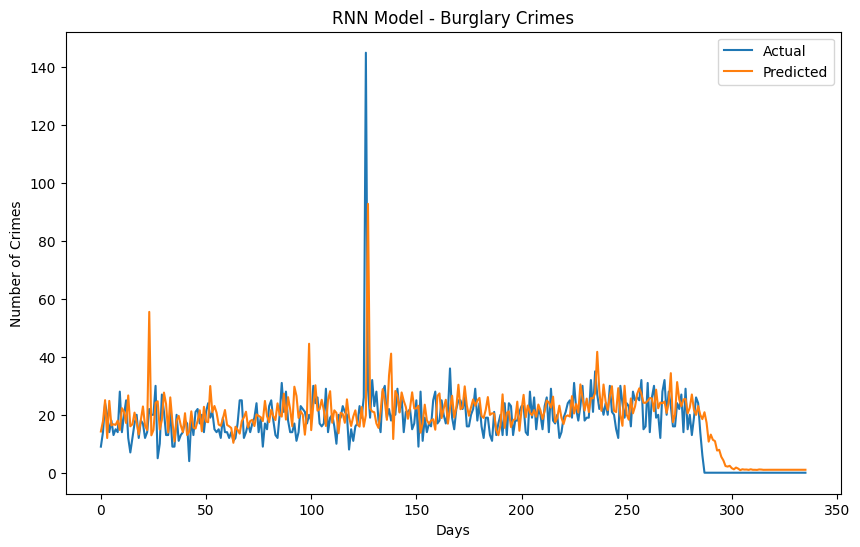

In [20]:
plot_results(burglary_y_test, burglary_rnn_predictions, "RNN Model - Burglary Crimes")

In [21]:
lstm_model_larceny = build_lstm_model(input_shape=(timesteps, 1))
lstm_model_larceny.fit(larceny_X_train, larceny_y_train, epochs=50, verbose=1)
larceny_lstm_mape, larceny_lstm_rmse, larceny_lstm_predictions = evaluate_model(lstm_model_larceny, larceny_X_test, larceny_y_test)
print(f"Larceny LSTM - MAPE: {larceny_lstm_mape}, RMSE: {larceny_lstm_rmse}")

Epoch 1/50
22/22 [==============================] - 4s 42ms/step - loss: 1415.0955
Epoch 2/50
22/22 [==============================] - 1s 43ms/step - loss: 454.6761
Epoch 3/50
22/22 [==============================] - 1s 40ms/step - loss: 261.6759
Epoch 4/50
22/22 [==============================] - 1s 40ms/step - loss: 191.6004
Epoch 5/50
22/22 [==============================] - 1s 43ms/step - loss: 138.6228
Epoch 6/50
22/22 [==============================] - 1s 38ms/step - loss: 122.7383
Epoch 7/50
22/22 [==============================] - 1s 42ms/step - loss: 114.7405
Epoch 8/50
22/22 [==============================] - 1s 59ms/step - loss: 109.3136
Epoch 9/50
22/22 [==============================] - 1s 61ms/step - loss: 96.2219
Epoch 10/50
22/22 [==============================] - 1s 52ms/step - loss: 131.7214
Epoch 11/50
22/22 [==============================] - 1s 40ms/step - loss: 147.5348
Epoch 12/50
22/22 [==============================] - 1s 54ms/step - loss: 141.0677
Epoch 13/50
2

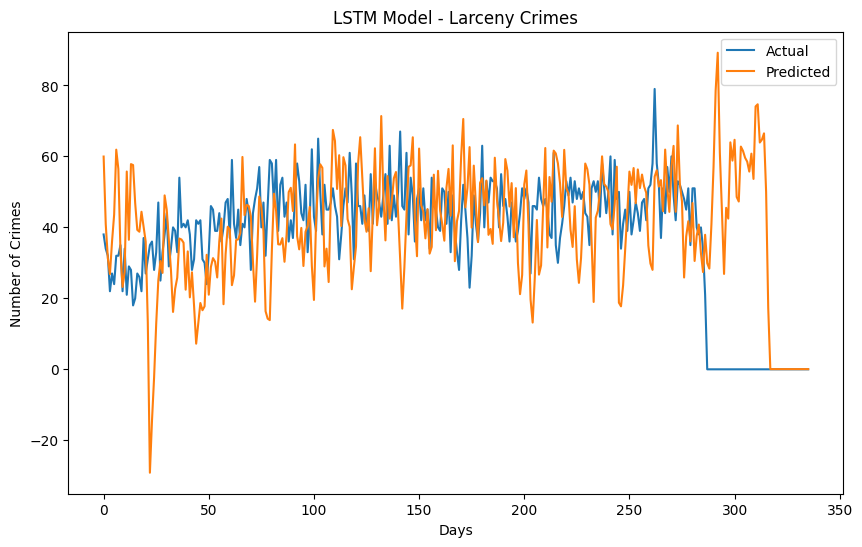

In [22]:
plot_results(larceny_y_test, larceny_lstm_predictions, "LSTM Model - Larceny Crimes")

In [23]:
lstm_model_burglary = build_lstm_model(input_shape=(timesteps, 1))
lstm_model_burglary.fit(burglary_X_train, burglary_y_train, epochs=50, verbose=1)
burglary_lstm_mape, burglary_lstm_rmse, burglary_lstm_predictions = evaluate_model(lstm_model_burglary, burglary_X_test, burglary_y_test)
print(f"Burglary LSTM - MAPE: {burglary_lstm_mape}, RMSE: {burglary_lstm_rmse}")

Epoch 1/50
22/22 [==============================] - 4s 39ms/step - loss: 664.7211
Epoch 2/50
22/22 [==============================] - 1s 39ms/step - loss: 1072.2954
Epoch 3/50
22/22 [==============================] - 1s 41ms/step - loss: 1620.5853
Epoch 4/50
22/22 [==============================] - 1s 40ms/step - loss: 248.8538
Epoch 5/50
22/22 [==============================] - 1s 40ms/step - loss: 193.8234
Epoch 6/50
22/22 [==============================] - 1s 39ms/step - loss: 204.2169
Epoch 7/50
22/22 [==============================] - 1s 40ms/step - loss: 209.5695
Epoch 8/50
22/22 [==============================] - 1s 42ms/step - loss: 237.6503
Epoch 9/50
22/22 [==============================] - 1s 38ms/step - loss: 196.5790
Epoch 10/50
22/22 [==============================] - 1s 39ms/step - loss: 142.6198
Epoch 11/50
22/22 [==============================] - 1s 48ms/step - loss: 140.2634
Epoch 12/50
22/22 [==============================] - 1s 44ms/step - loss: 126.6928
Epoch 13/50

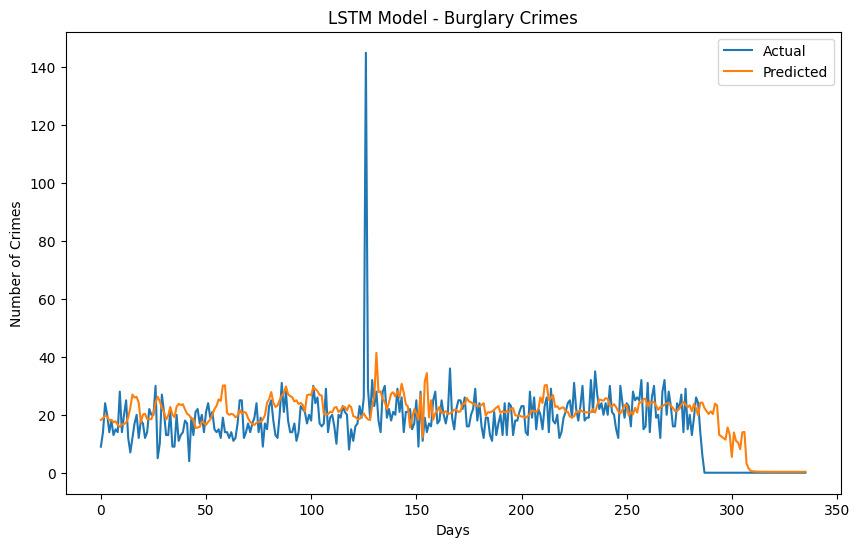

In [24]:
plot_results(burglary_y_test, burglary_lstm_predictions, "LSTM Model - Burglary Crimes")

### RNN models seems to perform better than the LSTM models for both cases.
### RNN > LSTM (in this case)
### MAPE for all models was extremely high, RMSE was more reasonable.